In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("C:/Users/Anmol/Desktop/data science/salary_data.csv")

In [3]:
dataset.shape

(30, 2)

In [4]:
dataset.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values

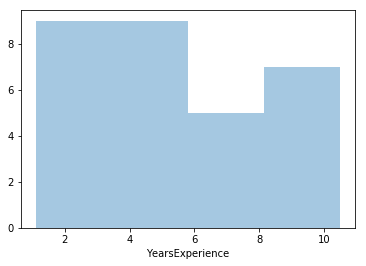

In [9]:
sb.distplot(dataset["YearsExperience"],kde=False)

In [10]:
dataset["YearsExperience"].skew()

0.37956024064804106

In [11]:
dataset["YearsExperience"].kurt()

-1.0122119403325072

In [12]:
dataset["YearsExperience"].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

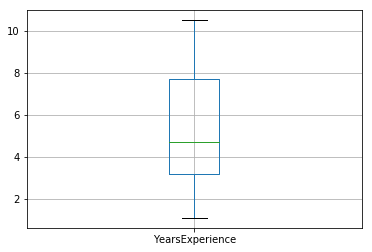

In [15]:
dataset.boxplot(column="YearsExperience")

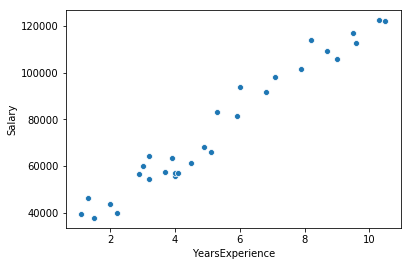

In [17]:
sb.scatterplot(dataset["YearsExperience"],dataset["Salary"])

In [18]:
np.corrcoef(dataset["YearsExperience"],dataset["Salary"])[0,1]

0.9782416184887599

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
regressor.score(X_test,y_test)

0.988169515729126

In [25]:
regressor.predict([[1.5]])

array([40748.96184072])

In [27]:
regressor.predict([[1.6]])

array([41680.21935339])

In [28]:
regressor.predict([[1.7]])

array([42611.47686607])

In [30]:
regressor.predict([[1.8]])

array([43542.73437874])

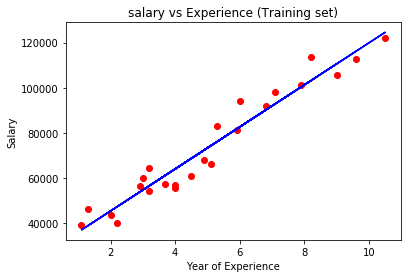

In [33]:
plt.scatter(X_train,y_train,color = 'red')
plt.plot(X_train, regressor.predict(X_train),color = "blue")
plt.title("salary vs Experience (Training set)")
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

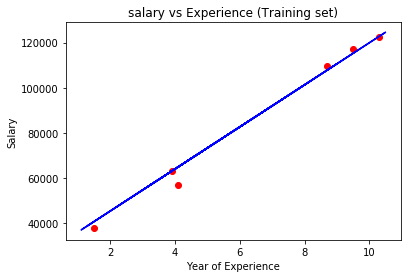

In [34]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_train, regressor.predict(X_train),color = "blue")
plt.title("salary vs Experience (Training set)")
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

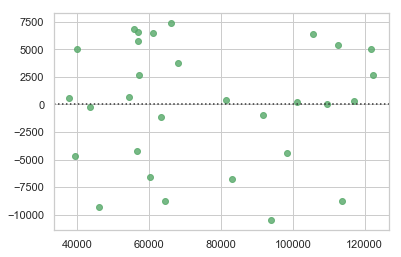

In [36]:
y_pred_all = regressor.predict(X)
# plot residuals after fitting a linear model
sb.set(style="whitegrid")
sb.residplot(y,y_pred_all, color="g")